# Model training and evaluation

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

In [2]:
# metrics for each class + weighted average (- bad impact)
# micro f1 = accuracy
def print_metrics(cls):
    sns.heatmap(metrics.confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
    print('accuracy: ',metrics.accuracy_score(y_test, cls.predict(X_test)))
    print()
    print(metrics.classification_report(y_test, cls.predict(X_test)))
    print('macro precision: ',metrics.precision_score(y_test, cls.predict(X_test), average='macro'))
    print('micro precision: ',metrics.precision_score(y_test, cls.predict(X_test), average='micro'))
    print()
    print('micro recall: ',metrics.recall_score(y_test, cls.predict(X_test), average='micro'))
    print('macro recall: ',metrics.recall_score(y_test, cls.predict(X_test), average='macro'))
    print()
    print('micro f1: ',metrics.f1_score(y_test, cls.predict(X_test), average='micro'))
    print('macro f1: ',metrics.f1_score(y_test, cls.predict(X_test), average='macro'))
    plt.show()

In [3]:
def train_eval(classifier, rand_state = False, **kwargs):
    if rand_state:
        cls = classifier(random_state=16, **kwargs)
    else:
        cls = classifier(**kwargs)
    cls.fit(X_train, y_train)
    print_metrics(cls)

In [4]:
# prepare original data 
X_train = pd.read_csv('data/split/transformed/train_original.csv', index_col=0)
X_test = pd.read_csv('data/split/transformed/test_original.csv', index_col=0)

X_train = X_train[(X_train['ratio_running_duration'] >= 0) & (X_train['ratio_running_duration'] < 25)]
X_test = X_test[(X_test['ratio_running_duration'] >= 0) & (X_test['ratio_running_duration'] < 25)]

y_train = X_train['class']
y_test = X_test['class']

X_train.drop('class', axis=1, inplace=True)
X_test.drop('class', axis=1, inplace=True)

In [ ]:
# prepare transformed data 
X_train = pd.read_csv('data/split/transformed/train.csv', index_col=0)
X_test = pd.read_csv('data/split/transformed/test.csv', index_col=0)

X_train = X_train[(X_train['ratio_running_duration_original'] >= 0) & (X_train['ratio_running_duration_original'] < 25)]
X_test = X_test[(X_test['ratio_running_duration_original'] >= 0) & (X_test['ratio_running_duration_original'] < 25)]

y_train = X_train['class']
y_test = X_test['class']

X_train.drop(['class', 'ratio_running_duration_original'], axis=1, inplace=True)
X_test.drop(['class', 'ratio_running_duration_original'], axis=1, inplace=True)

## Classifiers

accuracy:  0.518777848504

             precision    recall  f1-score   support

          1       0.77      0.68      0.72       655
          2       0.15      0.01      0.02       202
          3       0.30      0.51      0.38       379
          4       0.53      0.52      0.52       335

avg / total       0.52      0.52      0.51      1571

macro precision:  0.436632193049
micro precision:  0.518777848504

micro recall:  0.518777848504
macro recall:  0.430055021719

micro f1:  0.518777848504
macro f1:  0.409875137219


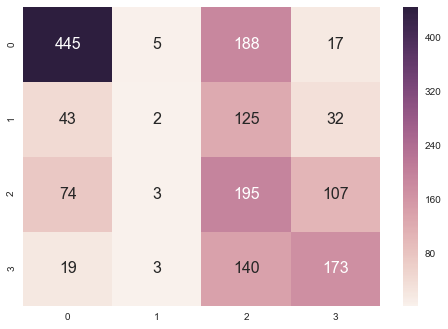

In [5]:
# 0.518777848504
# 0.50986632718
from sklearn.naive_bayes import BernoulliNB
train_eval(BernoulliNB)

accuracy:  0.635264162954

             precision    recall  f1-score   support

          1       0.85      0.85      0.85       655
          2       0.29      0.34      0.31       202
          3       0.46      0.44      0.45       379
          4       0.64      0.61      0.63       335

avg / total       0.64      0.64      0.64      1571

macro precision:  0.560725538491
micro precision:  0.635264162954

micro recall:  0.635264162954
macro recall:  0.560087587883

micro f1:  0.635264162954
macro f1:  0.559763693788


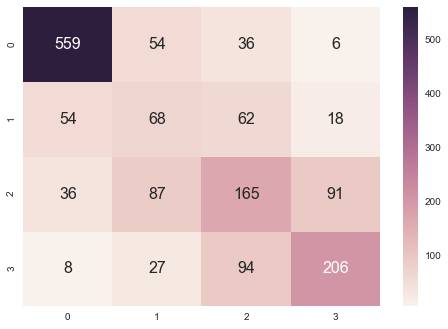

In [6]:
# 0.635264162954
# 0.631444939529
from sklearn.tree import DecisionTreeClassifier
train_eval(DecisionTreeClassifier, True)

accuracy:  0.539783577339

             precision    recall  f1-score   support

          1       0.77      0.75      0.76       655
          2       0.17      0.20      0.19       202
          3       0.40      0.40      0.40       379
          4       0.51      0.50      0.51       335

avg / total       0.55      0.54      0.54      1571

macro precision:  0.464841589721
micro precision:  0.539783577339

micro recall:  0.539783577339
macro recall:  0.462066110256

micro f1:  0.539783577339
macro f1:  0.463092768155


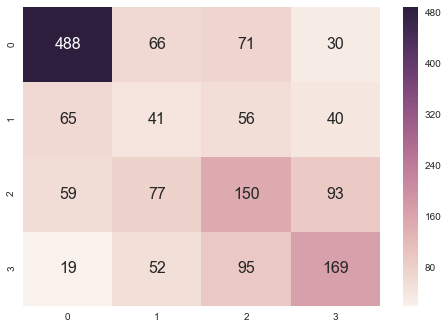

In [7]:
# 0.539783577339
# 0.611712285169
from sklearn.tree import ExtraTreeClassifier
train_eval(ExtraTreeClassifier, True)

accuracy:  0.657542966264

             precision    recall  f1-score   support

          1       0.77      0.94      0.85       655
          2       0.30      0.21      0.24       202
          3       0.52      0.45      0.49       379
          4       0.68      0.61      0.64       335

avg / total       0.63      0.66      0.64      1571

macro precision:  0.566421882609
micro precision:  0.657542966264

micro recall:  0.657542966264
macro recall:  0.553137471332

micro f1:  0.657542966264
macro f1:  0.554912782602


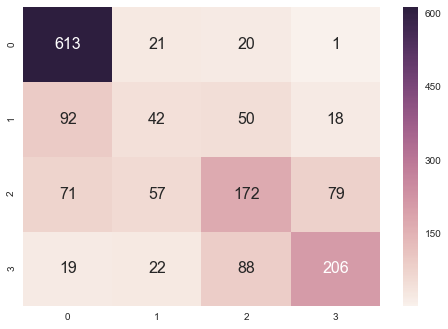

In [8]:
# 0.657542966264
# 0.684914067473
from sklearn.ensemble import ExtraTreesClassifier
train_eval(ExtraTreesClassifier, True)

accuracy:  0.332908975175

             precision    recall  f1-score   support

          1       0.99      0.12      0.22       655
          2       0.14      0.15      0.14       202
          3       0.29      0.90      0.44       379
          4       0.85      0.21      0.34       335

avg / total       0.68      0.33      0.29      1571

macro precision:  0.564895238085
micro precision:  0.332908975175

micro recall:  0.332908975175
macro recall:  0.346241806189

micro f1:  0.332908975175
macro f1:  0.283961783554


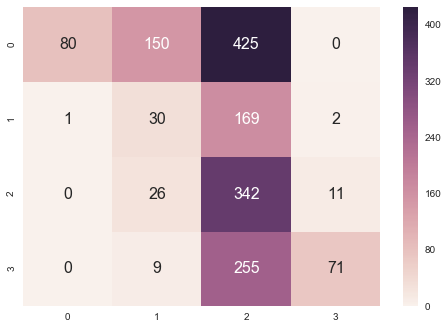

In [9]:
# 0.332908975175
# 0.62126034373
from sklearn.naive_bayes import GaussianNB
train_eval(GaussianNB)

accuracy:  0.661362189688

             precision    recall  f1-score   support

          1       0.79      0.95      0.86       655
          2       0.27      0.21      0.24       202
          3       0.52      0.46      0.48       379
          4       0.70      0.60      0.65       335

avg / total       0.64      0.66      0.64      1571

macro precision:  0.568835286962
micro precision:  0.661362189688

micro recall:  0.661362189688
macro recall:  0.555103086189

micro f1:  0.661362189688
macro f1:  0.557774905863


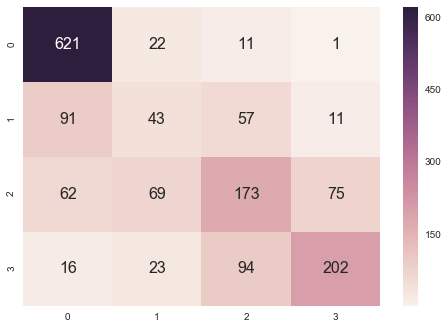

In [10]:
# 0.661362189688
# 0.520050922979
from sklearn.neighbors import KNeighborsClassifier
train_eval(KNeighborsClassifier)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


accuracy:  0.556333545512

             precision    recall  f1-score   support

          1       0.55      0.95      0.70       655
          2       0.19      0.02      0.04       202
          3       0.39      0.19      0.26       379
          4       0.74      0.52      0.61       335

avg / total       0.51      0.56      0.49      1571

macro precision:  0.46982319997
micro precision:  0.556333545512

micro recall:  0.556333545512
macro recall:  0.420953939049

micro f1:  0.556333545512
macro f1:  0.402182784997


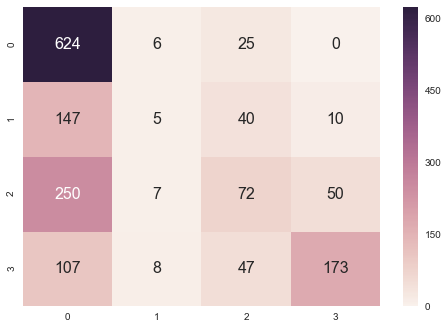

In [11]:
# 0.556333545512
# 0.707192870783
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
train_eval(LinearDiscriminantAnalysis)

accuracy:  0.234245703374

             precision    recall  f1-score   support

          1       0.41      0.23      0.30       655
          2       0.19      0.37      0.25       202
          3       0.00      0.00      0.00       379
          4       0.17      0.42      0.24       335

avg / total       0.23      0.23      0.21      1571

macro precision:  0.194232971327
micro precision:  0.234245703374

micro recall:  0.234245703374
macro recall:  0.255696340683

micro f1:  0.234245703374
macro f1:  0.199075950166


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


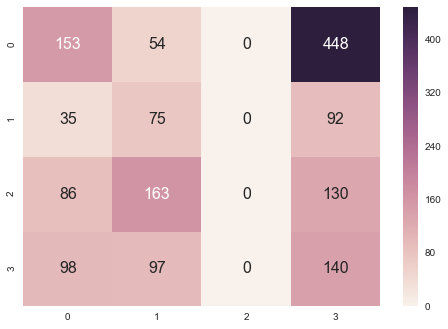

In [12]:
# 0.234245703374
# 0.69318905156
from sklearn.svm import LinearSVC
train_eval(LinearSVC, True, multi_class='crammer_singer')

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


accuracy:  0.729471674093

             precision    recall  f1-score   support

          1       0.84      0.97      0.90       655
          2       0.47      0.27      0.34       202
          3       0.57      0.62      0.59       379
          4       0.78      0.67      0.72       335

avg / total       0.71      0.73      0.71      1571

macro precision:  0.664084546218
micro precision:  0.729471674093

micro recall:  0.729471674093
macro recall:  0.629969567835

micro f1:  0.729471674093
macro f1:  0.637438705496


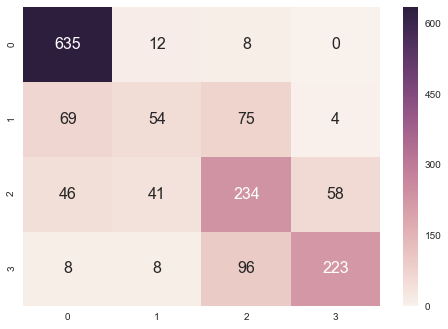

In [13]:
# 0.729471674093
# 0.740292807129
from sklearn.linear_model import LogisticRegression
train_eval(LogisticRegression, True, multi_class='multinomial', solver='newton-cg')

accuracy:  0.683004455761

             precision    recall  f1-score   support

          1       0.72      0.98      0.83       655
          2       0.50      0.12      0.20       202
          3       0.56      0.51      0.53       379
          4       0.74      0.64      0.69       335

avg / total       0.66      0.68      0.65      1571

macro precision:  0.631138958658
micro precision:  0.683004455761

micro recall:  0.683004455761
macro recall:  0.561964741785

micro f1:  0.683004455761
macro f1:  0.561836857656


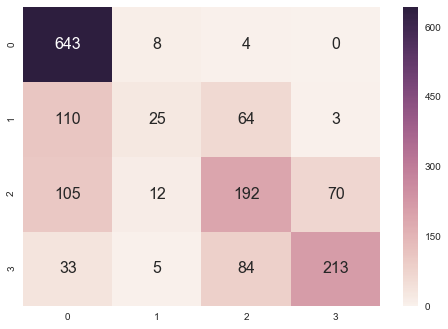

In [14]:
# 0.683004455761
# 0.743475493316
from sklearn.linear_model import LogisticRegressionCV
train_eval(LogisticRegressionCV, True, multi_class='multinomial')

accuracy:  0.62126034373

             precision    recall  f1-score   support

          1       0.89      0.84      0.86       655
          2       0.31      0.45      0.37       202
          3       0.45      0.33      0.38       379
          4       0.54      0.62      0.58       335

avg / total       0.64      0.62      0.62      1571

macro precision:  0.549570603332
micro precision:  0.62126034373

micro recall:  0.62126034373
macro recall:  0.561266442949

micro f1:  0.62126034373
macro f1:  0.549337933321


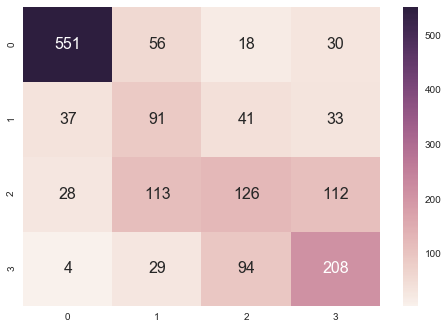

In [15]:
# 0.62126034373
# 0.727562062381
from sklearn.neural_network import MLPClassifier
train_eval(MLPClassifier, True)

accuracy:  0.319541693189

             precision    recall  f1-score   support

          1       0.87      0.13      0.22       655
          2       0.14      0.24      0.17       202
          3       0.29      0.81      0.43       379
          4       0.89      0.19      0.31       335

avg / total       0.64      0.32      0.28      1571

macro precision:  0.547724792401
micro precision:  0.319541693189

micro recall:  0.319541693189
macro recall:  0.341844475349

micro f1:  0.319541693189
macro f1:  0.2843087901


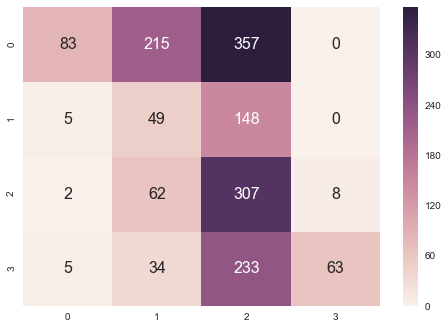

In [16]:
# 0.319541693189
# 0.386378103119
from sklearn.neighbors import NearestCentroid
train_eval(NearestCentroid)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


accuracy:  0.616804583068

             precision    recall  f1-score   support

          1       0.80      0.92      0.86       655
          2       0.26      0.34      0.29       202
          3       0.45      0.48      0.46       379
          4       0.79      0.34      0.48       335

avg / total       0.64      0.62      0.61      1571

macro precision:  0.574916391112
micro precision:  0.616804583068

micro recall:  0.616804583068
macro recall:  0.521144426113

micro f1:  0.616804583068
macro f1:  0.523110534753


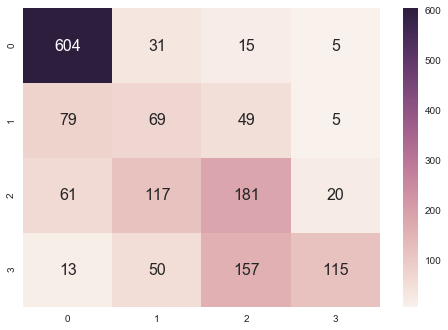

In [17]:
# 0.616804583068
# 0.594525779758
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
train_eval(QuadraticDiscriminantAnalysis)

accuracy:  0.416931890516



C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.42      1.00      0.59       655
          2       0.00      0.00      0.00       202
          3       0.00      0.00      0.00       379
          4       0.00      0.00      0.00       335

avg / total       0.17      0.42      0.25      1571



C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


macro precision:  0.104232972629
micro precision:  0.416931890516

micro recall:  0.416931890516
macro recall:  0.25

micro f1:  0.416931890516
macro f1:  0.147124887691


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


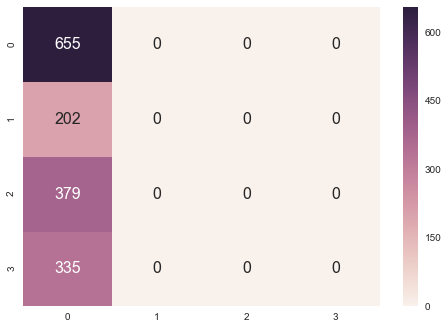

In [24]:
# 0.416931890516
# 0.476129853596
from sklearn.neighbors import RadiusNeighborsClassifier
train_eval(RadiusNeighborsClassifier, radius=30000000)

accuracy:  0.706556333546

             precision    recall  f1-score   support

          1       0.84      0.96      0.90       655
          2       0.42      0.34      0.38       202
          3       0.54      0.51      0.53       379
          4       0.72      0.64      0.68       335

avg / total       0.69      0.71      0.70      1571

macro precision:  0.630665726312
micro precision:  0.706556333546

micro recall:  0.706556333546
macro recall:  0.615398101842

micro f1:  0.706556333546
macro f1:  0.620497485703


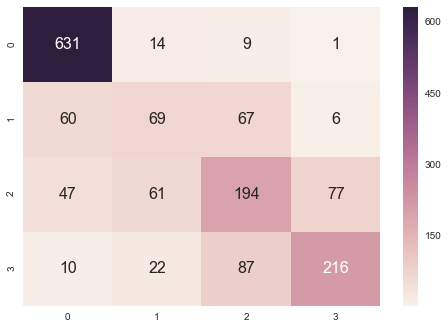

In [25]:
# 0.706556333546
# 0.700827498409
from sklearn.ensemble import RandomForestClassifier
train_eval(RandomForestClassifier, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.26545422342852e-17 / 1.1102230246251565e-16
  RuntimeWarning)


accuracy:  0.548058561426

             precision    recall  f1-score   support

          1       0.53      0.97      0.69       655
          2       0.00      0.00      0.00       202
          3       0.38      0.07      0.12       379
          4       0.66      0.59      0.62       335

avg / total       0.45      0.55      0.45      1571

macro precision:  0.391448710998
micro precision:  0.548058561426

micro recall:  0.548058561426
macro recall:  0.408405950068

micro f1:  0.548058561426
macro f1:  0.356865861887


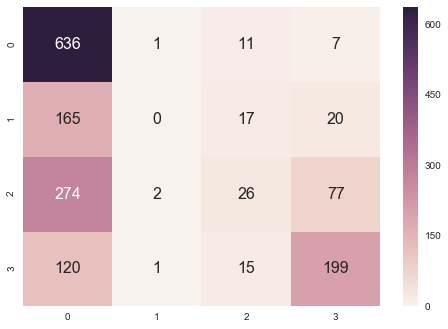

In [26]:
# 0.548058561426
# 0.682367918523
from sklearn.linear_model import RidgeClassifier
train_eval(RidgeClassifier, True)

accuracy:  0.548695098663

             precision    recall  f1-score   support

          1       0.53      0.97      0.69       655
          2       0.00      0.00      0.00       202
          3       0.39      0.07      0.12       379
          4       0.66      0.59      0.62       335

avg / total       0.46      0.55      0.45      1571

macro precision:  0.394218064072
micro precision:  0.548695098663

micro recall:  0.548695098663
macro recall:  0.409065580675

micro f1:  0.548695098663
macro f1:  0.358159648952


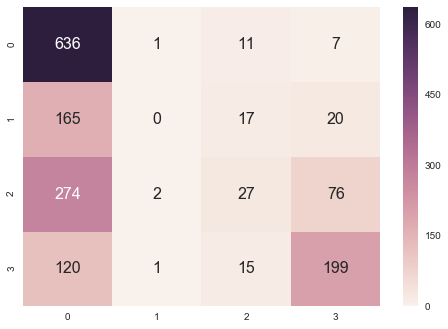

In [27]:
# 0.548695098663
# 0.682367918523
from sklearn.linear_model import RidgeClassifierCV
train_eval(RidgeClassifierCV)

### 1v1

accuracy:  0.416931890516



C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.42      1.00      0.59       655
          2       0.00      0.00      0.00       202
          3       0.00      0.00      0.00       379
          4       0.00      0.00      0.00       335

avg / total       0.17      0.42      0.25      1571



C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


macro precision:  0.104232972629
micro precision:  0.416931890516

micro recall:  0.416931890516
macro recall:  0.25

micro f1:  0.416931890516
macro f1:  0.147124887691


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


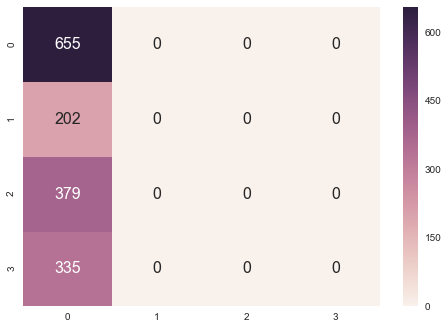

In [28]:
# 0.416931890516
# 0.64608529599
from sklearn.svm import NuSVC
train_eval(NuSVC, True, nu=0.1)

accuracy:  0.416931890516



C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.42      1.00      0.59       655
          2       0.00      0.00      0.00       202
          3       0.00      0.00      0.00       379
          4       0.00      0.00      0.00       335

avg / total       0.17      0.42      0.25      1571



C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


macro precision:  0.104232972629
micro precision:  0.416931890516

micro recall:  0.416931890516
macro recall:  0.25

micro f1:  0.416931890516


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


macro f1:  0.147124887691


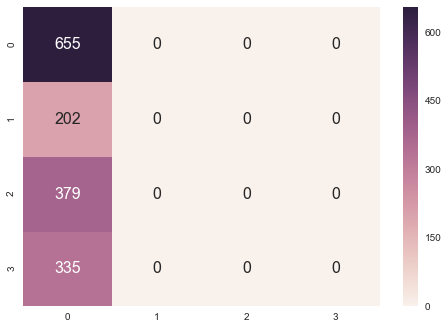

In [29]:
# 0.416931890516
# 0.682367918523
from sklearn.svm import SVC
train_eval(SVC, True)

accuracy:  0.416931890516

             precision    recall  f1-score   support

          1       0.43      0.96      0.59       655
          2       0.10      0.02      0.03       202
          3       0.32      0.02      0.04       379
          4       0.46      0.04      0.07       335

avg / total       0.37      0.42      0.27      1571

macro precision:  0.325926209559
micro precision:  0.416931890516

micro recall:  0.416931890516
macro recall:  0.260022458441

micro f1:  0.416931890516
macro f1:  0.182631946547


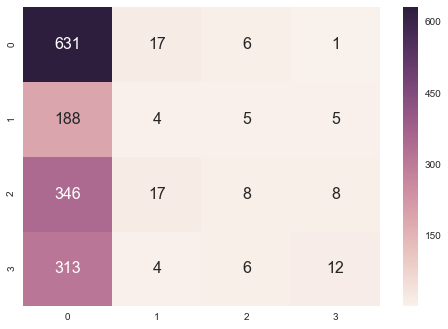

In [30]:
# 0.416931890516
# 0.606619987269
from sklearn.gaussian_process import GaussianProcessClassifier
train_eval(GaussianProcessClassifier, True, multi_class='one_vs_one')

### 1vAll

accuracy:  0.731381285805

             precision    recall  f1-score   support

          1       0.85      0.96      0.90       655
          2       0.42      0.34      0.38       202
          3       0.60      0.56      0.58       379
          4       0.75      0.71      0.73       335

avg / total       0.71      0.73      0.72      1571

macro precision:  0.657146642569
micro precision:  0.731381285805

micro recall:  0.731381285805
macro recall:  0.642451739451

micro f1:  0.731381285805
macro f1:  0.647332403091


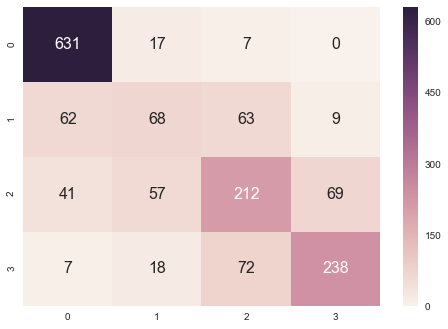

In [31]:
# 0.731381285805
# 0.73774665818
from sklearn.ensemble import GradientBoostingClassifier
train_eval(GradientBoostingClassifier, True)

accuracy:  0.217059197963



C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.86      0.01      0.02       655
          2       0.00      0.00      0.00       202
          3       0.00      0.00      0.00       379
          4       0.21      1.00      0.35       335

avg / total       0.40      0.22      0.08      1571



C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


macro precision:  0.267834307636
micro precision:  0.217059197963

micro recall:  0.217059197963
macro recall:  0.252290076336

micro f1:  0.217059197963
macro f1:  0.0927360401165


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


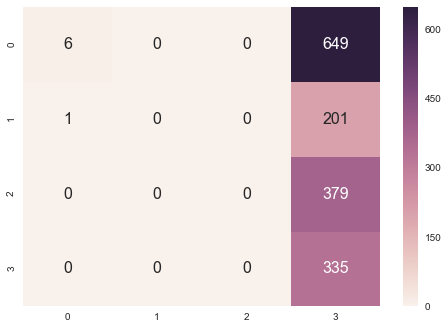

In [32]:
# 0.217059197963
# 0.60152768937
from sklearn.gaussian_process import GaussianProcessClassifier
train_eval(GaussianProcessClassifier, True)

accuracy:  0.377466581795

             precision    recall  f1-score   support

          1       0.74      0.38      0.51       655
          2       0.71      0.02      0.05       202
          3       0.43      0.02      0.04       379
          4       0.27      0.98      0.43       335

avg / total       0.56      0.38      0.32      1571

macro precision:  0.538963515581
micro precision:  0.377466581795

micro recall:  0.377466581795
macro recall:  0.352337851127

micro f1:  0.377466581795
macro f1:  0.256151780385


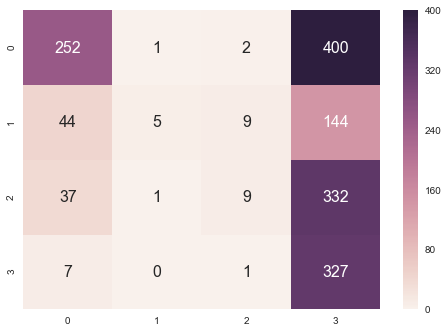

In [33]:
# 0.377466581795
# 0.711012094208
from sklearn.svm import LinearSVC
train_eval(LinearSVC, True, multi_class='ovr')

accuracy:  0.704010184596

             precision    recall  f1-score   support

          1       0.78      0.98      0.87       655
          2       0.41      0.08      0.13       202
          3       0.57      0.51      0.54       379
          4       0.69      0.76      0.72       335

avg / total       0.66      0.70      0.66      1571

macro precision:  0.612348900946
micro precision:  0.704010184596

micro recall:  0.704010184596
macro recall:  0.582274086624

micro f1:  0.704010184596
macro f1:  0.565838713861


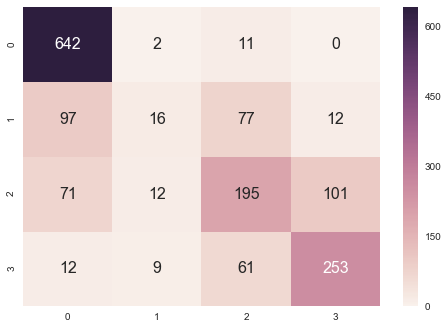

In [34]:
# 0.704010184596
# 0.718650541057
from sklearn.linear_model import LogisticRegression
train_eval(LogisticRegression, True, multi_class='ovr')

accuracy:  0.703373647358

             precision    recall  f1-score   support

          1       0.78      0.98      0.87       655
          2       0.45      0.05      0.09       202
          3       0.55      0.53      0.54       379
          4       0.69      0.76      0.72       335

avg / total       0.67      0.70      0.66      1571

macro precision:  0.619977704089
micro precision:  0.703373647358

micro recall:  0.703373647358
macro recall:  0.578511086351

micro f1:  0.703373647358
macro f1:  0.555364083177


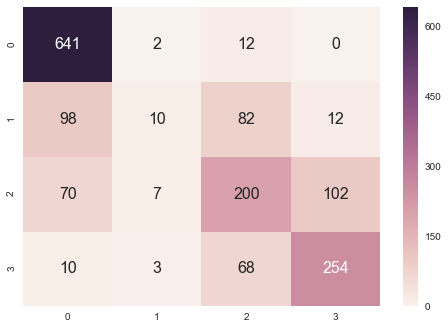

In [35]:
# 0.703373647358
# 0.694462126034
from sklearn.linear_model import LogisticRegressionCV
train_eval(LogisticRegressionCV, True, multi_class='ovr')

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.524506683641

             precision    recall  f1-score   support

          1       0.94      0.48      0.63       655
          2       0.00      0.00      0.00       202
          3       0.31      0.73      0.43       379
          4       0.69      0.70      0.70       335

avg / total       0.61      0.52      0.52      1571

macro precision:  0.48485176109
micro precision:  0.524506683641

micro recall:  0.524506683641
macro recall:  0.476983468727

micro f1:  0.524506683641
macro f1:  0.440618292733


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


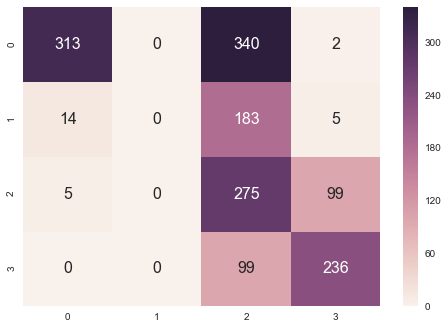

In [36]:
# 0.524506683641
# 0.64863144494
from sklearn.linear_model import SGDClassifier
train_eval(SGDClassifier, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.524506683641

             precision    recall  f1-score   support

          1       0.94      0.48      0.63       655
          2       0.00      0.00      0.00       202
          3       0.31      0.73      0.43       379
          4       0.69      0.70      0.70       335

avg / total       0.61      0.52      0.52      1571

macro precision:  0.48485176109
micro precision:  0.524506683641

micro recall:  0.524506683641
macro recall:  0.476983468727

micro f1:  0.524506683641
macro f1:  0.440618292733


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


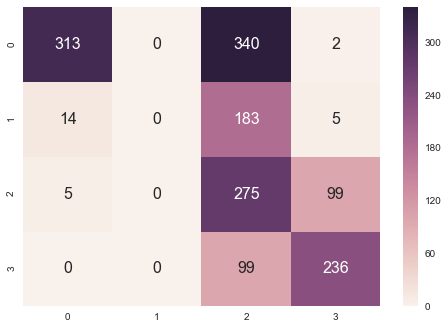

In [37]:
# 0.524506683641
# 0.681731381286
from sklearn.linear_model import Perceptron
train_eval(Perceptron, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.628262253342

             precision    recall  f1-score   support

          1       0.84      0.94      0.88       655
          2       0.00      0.00      0.00       202
          3       0.44      0.25      0.32       379
          4       0.45      0.83      0.58       335

avg / total       0.55      0.63      0.57      1571

macro precision:  0.431043738787
micro precision:  0.628262253342

micro recall:  0.628262253342
macro recall:  0.504756690475

micro f1:  0.628262253342
macro f1:  0.446797830274


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


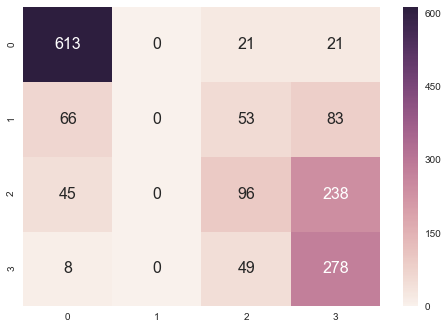

In [38]:
# 0.628262253342
# 0.621896880968
from sklearn.linear_model import PassiveAggressiveClassifier
train_eval(PassiveAggressiveClassifier, True)